In [60]:
%pip install surprise

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [61]:
import pandas as pd
import numpy as np
from surprise.model_selection import GridSearchCV

In [62]:
df = pd.read_json('uncleaned_archive/yelp_academic_dataset_business.json', lines=True)

In [63]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [64]:
df.isnull().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

In [65]:
df.shape

(150346, 14)

In [66]:
df.dropna(inplace=True)

In [67]:
df.isnull().sum()

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
dtype: int64

In [68]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."


In [69]:
df.sort_values(['stars', 'review_count'], ascending=False).head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
12307,_aKr7POnacW_VizRKBpCiA,Blues City Deli,2438 McNair Ave,Saint Louis,MO,63104,38.605024,-90.218110,5.0,991,1,"{'BikeParking': 'True', 'RestaurantsAttire': '...","Delis, Bars, Restaurants, Nightlife, Pubs, Ame...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-15:0',..."
134154,8QqnRpM-QxGsjDNuu0E57A,Carlillos Cocina,415 S Rock Blvd,Sparks,NV,89431,39.530096,-119.766608,5.0,799,1,"{'NoiseLevel': 'u'average'', 'GoodForMeal': '{...","Bars, Mexican, Breakfast & Brunch, Restaurants...","{'Monday': '7:0-14:0', 'Tuesday': '7:0-14:0', ..."
25015,zxIF-bnaJ-eKIsznB7yu7A,Free Tours By Foot,2613 Laurel St,New Orleans,LA,70130,29.925353,-90.079988,5.0,769,1,{'WiFi': 'u'no''},"Hotels & Travel, Walking Tours, Tours","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."
16555,DVBJRvnCpkqaYl6nHroaMg,Tumerico,2526 E 6th St,Tucson,AZ,85716,32.227705,-110.934722,5.0,705,1,"{'RestaurantsGoodForGroups': 'True', 'Business...","Mexican, Gluten-Free, Vegetarian, Restaurants,...","{'Tuesday': '9:0-15:0', 'Wednesday': '9:0-20:0..."
70650,gP_oWJykA2RocIs_GurKWQ,Yats,"2000 Mallory Ln, Ste 615",Franklin,TN,37067,35.948778,-86.818172,5.0,623,1,"{'ByAppointmentOnly': 'False', 'RestaurantsAtt...","Cajun/Creole, Restaurants, Caterers, Comfort F...","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'..."


In [70]:
df['categories_list'] = df['categories'].str.split(',')

In [71]:
df[df['categories'].str.contains('Food', case=False)].sort_values(['stars', 'review_count'], ascending=False)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,categories_list
70650,gP_oWJykA2RocIs_GurKWQ,Yats,"2000 Mallory Ln, Ste 615",Franklin,TN,37067,35.948778,-86.818172,5.0,623,1,"{'ByAppointmentOnly': 'False', 'RestaurantsAtt...","Cajun/Creole, Restaurants, Caterers, Comfort F...","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'...","[Cajun/Creole, Restaurants, Caterers, Comfo..."
119671,JbzvJJolDBT1614qo2Yiaw,Nelson's Green Brier Distillery,1414 Clinton St,Nashville,TN,37203,36.163519,-86.798211,5.0,545,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Distilleries, Tours, Hotels & Travel, Historic...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-18:0', ...","[Distilleries, Tours, Hotels & Travel, Hist..."
7930,D9p7-HsY9llYP3BaCVg4DA,Cafe Soleil,4695 Gulf Blvd,St. Pete Beach,FL,33706,27.723416,-82.739291,5.0,468,1,"{'BikeParking': 'True', 'RestaurantsAttire': '...","Restaurants, French, Coffee & Tea, Bakeries, B...","{'Monday': '8:0-15:0', 'Tuesday': '8:0-15:0', ...","[Restaurants, French, Coffee & Tea, Bakerie..."
33175,tARR9jhv5gi9TjsfSVmjmw,Kaffe Crepe,"1300 East Plumb Ln, Ste C4",Reno,NV,89502,39.504208,-119.782768,5.0,454,1,"{'Caters': 'False', 'HasTV': 'False', 'GoodFor...","Food, Restaurants, Cafes, Creperies, Coffee & Tea","{'Monday': '9:0-15:0', 'Tuesday': '8:0-16:0', ...","[Food, Restaurants, Cafes, Creperies, Coff..."
148632,vyOVT4bcW227LRwJGHTeSw,Buena Onda,724 E Haley St,Santa Barbara,CA,93103,34.424641,-119.686693,5.0,414,1,"{'WheelchairAccessible': 'True', 'RestaurantsA...","Event Planning & Services, Latin American, Cat...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-20:0', ...","[Event Planning & Services, Latin American, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130950,UJQGJ0tlKO93Lia2JGidZA,McDonald's,5219 Frankford Ave,Philadelphia,PA,19124,40.022512,-75.077527,1.0,5,0,"{'RestaurantsDelivery': 'False', 'GoodForKids'...","Restaurants, Fast Food, Food, Burgers, Coffee ...","{'Monday': '4:0-23:0', 'Tuesday': '4:0-23:0', ...","[Restaurants, Fast Food, Food, Burgers, Co..."
135384,rDNXWP86KQj13D4aBT8YJQ,Philly Pretzel Factory,5022-24 City Ave,Philadelphia,PA,19131,39.999294,-75.229832,1.0,5,1,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, Bakeries, Food, Pretzels, Ice Cre...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...","[Restaurants, Bakeries, Food, Pretzels, Ic..."
142579,z00F0RSAGimvSU9IrTevOw,McDonald's,3010 New Castle Ave,New Castle,DE,19720,39.700377,-75.551567,1.0,5,1,"{'RestaurantsPriceRange2': '1', 'RestaurantsDe...","Burgers, Coffee & Tea, Fast Food, Restaurants,...","{'Monday': '5:0-0:0', 'Tuesday': '5:0-0:0', 'W...","[Burgers, Coffee & Tea, Fast Food, Restaura..."
143208,Tj9FmBCHd84kjAE9vcoBnw,KFC,2474 Guardian Road NW,Edmonton,AB,T5T 1K8,53.509187,-113.675652,1.0,5,1,"{'DriveThru': 'True', 'RestaurantsTakeOut': 'T...","American (Traditional), Fast Food, Restaurants...","{'Monday': '10:30-22:0', 'Tuesday': '10:30-22:...","[American (Traditional), Fast Food, Restaura..."


In [72]:
df.reset_index(inplace=True)

In [73]:
df.drop(columns=['index'], inplace=True)

In [74]:
df_clean = pd.read_csv('cleaned_data/yelp_academic_dataset_business_cleaned.csv')
df_clean[['business_id', 'state', 'latitude', 'longitude', 'categories', 'stars', 'review_count']].to_csv('database_data/business_recommendation_system_input.csv', index=False)

In [75]:
df.to_csv('cleaned_data/yelp_academic_dataset_business_cleaned.csv', index=False)

c:\Users\tanma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


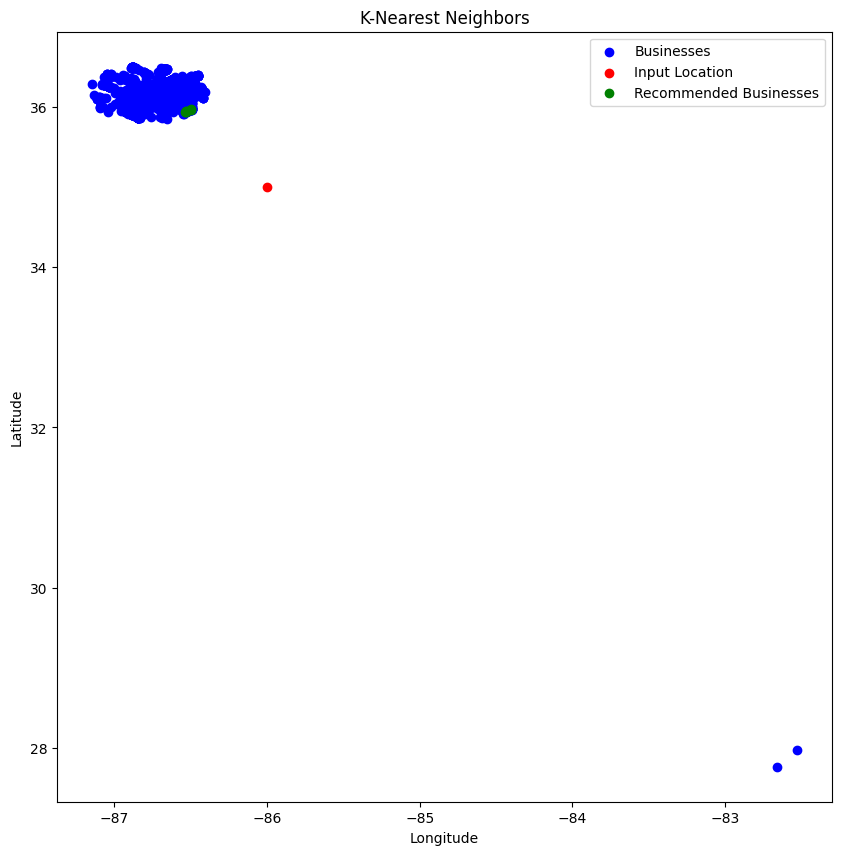

1996      TN
103305    TN
60058     TN
27875     TN
3695      TN
80893     TN
36638     TN
Name: state, dtype: object


['Y2jDVmMpRzQRg6HkNvQc8g',
 'Xyyq2pm4yttkHxQUexRkiw',
 'hfnQgCDLlbUfPHkkMlpb2w',
 '1DjUWO4csdFa-cg15dSGUQ',
 'iM1hWCwxoqO-d_djiKpEXQ',
 '59j7DxoQ304a3NV-u2rieg',
 'VK2lIzoVJOHSZJsiWWIC4g']

In [2]:
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import pandas as pd

df_clean = pd.read_csv('cleaned_data/yelp_academic_dataset_business_cleaned.csv')

# Create the model
model = NearestNeighbors(metric='euclidean')

model.fit(df_clean[['latitude', 'longitude']])
def recommend(lat, long, keyword, state):
    # Filter the DataFrame by the given state
    df_state = df_clean[df_clean['state'] == state]
    
    if df_state.empty:
        return "No businesses found in the given state."
    
    # Update the model with the filtered DataFrame
    
    # Find the 10 nearest neighbors to the given latitude and longitude
    distances, indices = model.kneighbors([[lat, long]], n_neighbors=50)
    # Filter the results by the keyword
    results = df_clean.iloc[indices[0]]
    results = results[results['state'] == state]
    results = results[results['categories'].str.contains(keyword, case=False, na=False)]
    results = results.sort_values(['stars', 'review_count'], ascending=False)
    
    if results.empty:
        return "No businesses found with the given keyword in the categories list."
    
    # Plot the KNN graph
    plt.figure(figsize=(10, 10))
    plt.scatter(df_state['longitude'], df_state['latitude'], color='blue', label='Businesses')
    plt.scatter([long], [lat], color='red', label='Input Location')
    plt.scatter(results['longitude'], results['latitude'], color='green', label='Recommended Businesses')
    plt.legend()
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('K-Nearest Neighbors')
    plt.show()
    print(results['state'])
    # Return the business_id of the top 10 results
    return results['business_id'].to_list()

# Test the function
latitude = 35.0
longitude = -86.0
preferences = 'Burger'
state = 'TN'
recommend(latitude, longitude, preferences, state)

In [3]:
from sklearn.neighbors import NearestNeighbors
from joblib import dump

# Create the model
model = NearestNeighbors(metric='euclidean')

# Train the model on the entire dataset
model.fit(df_clean[['latitude', 'longitude']])

# Save the model
dump(model, 'models/knn_model_recommendation_system_business.joblib')


['models/knn_model_recommendation_system_business.joblib']

In [ ]:
df['state'].unique()

array(['MO', 'AZ', 'PA', 'TN', 'FL', 'IN', 'LA', 'AB', 'NV', 'CA', 'ID',
       'DE', 'IL', 'NJ', 'NC', 'WA', 'TX', 'CO', 'MT', 'MI', 'HI', 'SD',
       'VI', 'VT'], dtype=object)